In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import datetime
import sys
sys.path.append('.')
sys.path.append("..")
sys.path.append("../..")
import pickle
EPS = np.finfo(np.float64).eps

PATH_RAW= '../../data/raw/' # Files as we received them from our collaborators
PATH_PROCESSED= '../../data/processed/' # Files that we have done some operations on
DATE = str(datetime.date.today())

This project received funding from the European Union’s Horizon 2020 research and innovation programme [952914] (FindingPheno).

# Initial look at the data


## Metabolomics

In [2]:
metab = pd.read_csv(f"{PATH_RAW}HoloFish_Metabolome_Abundances_20221114.csv")

In [3]:
metab.head(5)

,Sample.ID,FT_1,FT_2,FT_3,FT_4,FT_5,FT_6,FT_7,FT_8,FT_9,...,FT_962,FT_963,FT_964,FT_965,FT_966,FT_967,FT_968,FT_969,FT_970,FT_971
0,F012,4.750000e+08,936000000.0,1.430000e+08,240000000.0,168000000.0,161000000.0,161000000.0,1.570000e+08,107000000.0,...,31540.81299,1.410150e+05,1.140595e+06,6.860592e+06,2.302299e+06,140903.95880,1.427345e+06,10178.45348,165000000.0,4.898309e+06
1,F001,1.680000e+09,740000000.0,1.550000e+09,834000000.0,99700000.0,531000000.0,210000000.0,7.850000e+07,20800000.0,...,26363.16844,1.250000e+07,3.181576e+06,4.350000e+07,5.094721e+04,140107.55360,NaN,10672.54123,98100000.0,1.588459e+06
2,F010,3.700000e+07,670000000.0,4.589984e+05,34500000.0,247000000.0,10500000.0,527000000.0,2.570000e+09,36800000.0,...,117710.04370,1.280000e+07,6.018708e+05,6.510000e+07,2.890000e+08,104170.34010,8.070000e+07,4629.37531,244000000.0,3.895685e+06
3,F011,2.690000e+08,475000000.0,5.720000e+07,140000000.0,143000000.0,95200000.0,94500000.0,2.900000e+09,75600000.0,...,73103.31289,4.344824e+06,1.095944e+06,5.810000e+07,1.130000e+08,50542.04028,2.840000e+07,14696.53407,141000000.0,4.190000e+08
4,F002,1.930000e+09,545000000.0,1.620000e+09,890000000.0,126000000.0,650000000.0,73800000.0,3.050000e+09,11700000.0,...,76798.83386,4.108439e+05,1.014071e+06,7.510000e+07,1.760000e+08,426509.01990,6.200000e+07,6677.68796,123000000.0,2.400000e+08


In [4]:
metab.shape

(352, 972)

/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

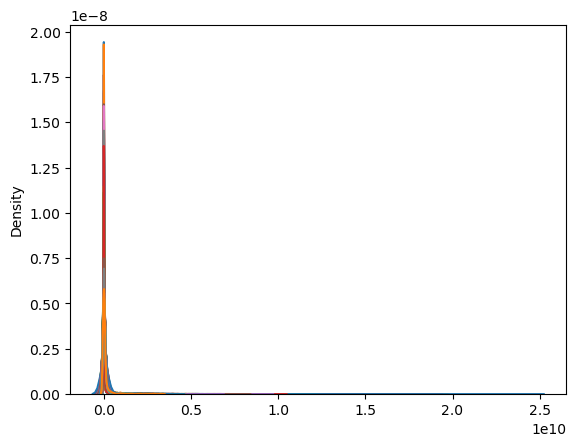

In [5]:
# The distribution is crazy, maybe we log them ?
for i,row in metab.set_index("Sample.ID").iterrows():
    sns.kdeplot(row.values)

/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

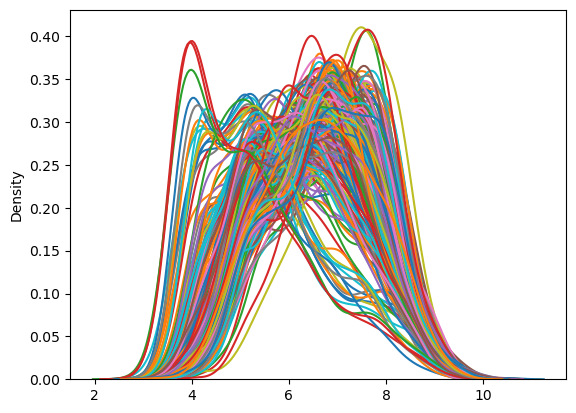

In [6]:
# much better !
for i,row in metab.set_index("Sample.ID").iterrows():
    sns.kdeplot( np.log10(row.values))

In [7]:
metab = metab.set_index("Sample.ID").apply(np.log10, axis=1)

## Metagenomics

In [8]:
metag = pd.read_csv(f"{PATH_RAW}HoloFish_MetaG_MeanCoverage_20221114.csv")

In [9]:
metag.head()

,Sample.ID,MAG07_Photobacterium_iliopiscarium,MAG06_Photobacterium_phosphoreum,MAG15_Psychromonas_sp,MAG08_Aliivibrio_sp,MAG09_Aliivibrio_sp,MAG10_Aliivibrio_salmonicida,MAG16_Prevotella_sp,MAG03_Mycoplasma_sp,MAG14_Clostridium_ljungdahlii,MAG12_Carnobacterium_maltaromaticum,MAG11_Brevinema_sp,MAG02_Mycoplasma_sp,MAG05_Mycoplasma_sp,MAG13_Lactobacillus_johnsonii,MAG04_Mycoplasma_sp,MAG01_Mycoplasma_salmoninae
0,F010,0.409176,3.331794,0.218722,65.806751,2.011733,1.962546,0.000613,0.307941,0.000852,0.006927,0.039953,0.124529,0.131163,0.171422,0.143140,311.754649
1,F101,0.003030,0.026437,0.000159,0.149916,0.013021,0.004108,0.000000,0.149363,0.000029,0.002913,6.533929,0.506295,0.077084,0.000522,0.142522,143.508570
2,F102,0.124356,0.370653,0.096078,11.185747,53.553059,6.347700,0.000015,0.100934,0.000058,0.001388,0.357069,0.028815,0.020045,0.000468,0.099256,44.789827
3,F104,0.015608,0.006785,0.004471,0.014781,0.012490,0.005907,0.002837,7.346950,0.080932,0.457639,0.121990,3.432386,3.860982,1.009542,12.033071,6862.208241
4,F105,0.001253,0.002487,0.000090,0.001982,0.002987,0.000466,0.000222,1.800695,0.002774,0.036205,0.270412,0.995199,0.638278,0.133863,0.812070,1668.601161


In [10]:
metag.shape

(398, 17)

/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

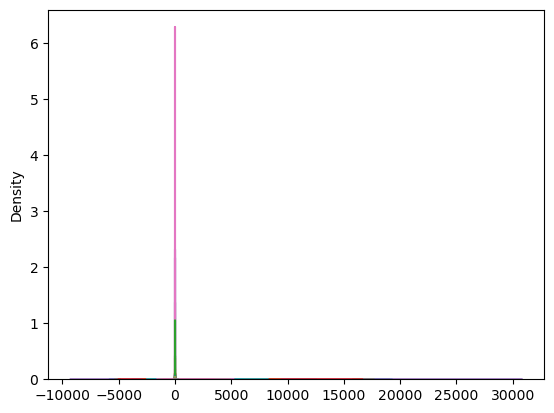

In [11]:
for i,row in metag.set_index("Sample.ID").iterrows():
    sns.kdeplot(row.values)

/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

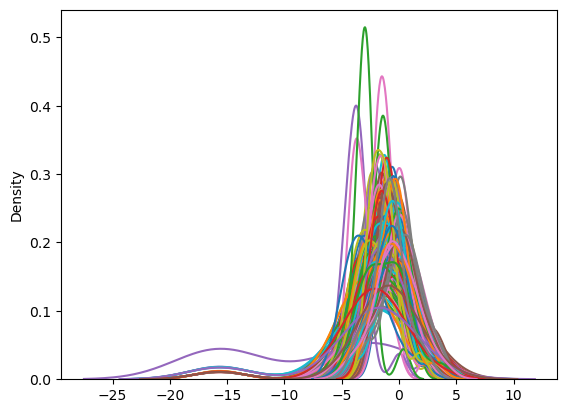

In [12]:
# much better !
for i,row in metag.set_index("Sample.ID").iterrows():
    sns.kdeplot( np.log10(row.values+EPS))

In [13]:
metag = metag.set_index("Sample.ID").apply(np.log10, axis=1)

## GWAS

Here we're just loading a tiny version of the file just to have a look, the dataframe "big" is the real gwas data further down


In [14]:
# The samples inthe original file are named in the "IndX" scheme while in most other tables they're named
# using the FXXX scheme
gwasdf = pd.read_csv(f"{PATH_PROCESSED}test.dose", sep=" ")
gwasdf.head(1)

,marker,alleleA,alleleB,Ind0,Ind1,Ind2,Ind3,Ind4,Ind5,Ind6,...,Ind351,Ind352,Ind353,Ind354,Ind355,Ind356,Ind357,Ind358,Ind359,Ind360
0,NC_059442.1_84727,0,2,1.0,0.0013,0.978,0.0035,0.0002,0.0005,0.0,...,0.9999,0.1223,0.0013,0.9994,0.0013,0.9996,0.0347,0.0053,0.0035,0.8773


### Fix GWAS sample names

In [15]:
# Load a mapping of IndX --> FXXX names
sidm = pd.read_csv(f"{PATH_RAW}HoloFish_FishVariables_20221116.csv")
sidm = sidm[["Sample.ID","HostG.Ind.ID"]]
sampleD = {b:a for a,b in sidm.dropna().values}

In [16]:
# rename the samples in the raw gwasdf
gwasdf.columns = list(gwasdf.columns[:3]) + [sampleD.get(x) for x in gwasdf.columns[3:]]

In [17]:
gwasdf

,marker,alleleA,alleleB,F001,F002,F003,F004,F005,F006,F007,...,F444,F445,F446,F447,F448,F449,F450,F451,F460,F461
0,NC_059442.1_84727,0,2,1.0000,0.0013,0.9780,0.0035,0.0002,0.0005,0.0000,...,0.9999,0.1223,0.0013,0.9994,0.0013,0.9996,0.0347,0.0053,0.0035,0.8773
1,NC_059442.1_84730,1,3,1.0000,0.0005,0.9713,0.0020,0.0001,0.0001,0.0000,...,0.9995,0.1111,0.0005,0.9985,0.0005,0.9989,0.0289,0.0040,0.0020,0.8659
2,NC_059442.1_132329,0,1,0.0334,0.0647,0.1294,0.1294,0.0086,0.0086,0.0170,...,0.0043,0.0334,0.0334,0.9559,0.9886,0.1294,0.0334,0.1294,0.0000,0.0022
3,NC_059442.1_141907,2,3,0.2496,1.0000,1.0000,1.0002,1.0000,0.0419,1.0000,...,1.9880,0.0058,1.0000,0.0005,1.0000,1.8395,1.0000,1.0013,0.0001,1.0000
4,NC_059442.1_141912,2,0,0.2462,1.0000,1.0000,1.0009,1.0000,0.0395,1.0000,...,1.9871,0.0052,1.0000,0.0004,1.0000,1.8367,1.0000,1.0063,0.0001,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NC_059442.1_441845,3,0,0.0000,0.0003,1.5982,0.0000,0.9995,0.0000,0.0000,...,0.0000,0.0000,1.0000,0.0000,0.1810,0.0000,1.0000,0.0001,0.0000,1.0000
96,NC_059442.1_441878,1,3,0.0001,0.0002,1.5095,0.0000,0.9989,0.0000,0.0001,...,0.0000,0.0000,0.9993,0.0000,0.1348,0.0001,1.0000,0.0009,0.0000,1.0000
97,NC_059442.1_442044,0,1,0.0000,0.0002,1.9992,0.0001,1.0001,0.0000,0.0004,...,0.0000,0.0000,0.6241,0.0000,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000
98,NC_059442.1_442048,1,0,0.0000,0.0002,1.9989,0.0000,1.0003,0.0000,0.0003,...,0.0000,0.0000,0.6204,0.0001,1.0000,0.0000,1.0000,0.0000,0.0000,1.0000


In [18]:
gwasdf.head()

,marker,alleleA,alleleB,F001,F002,F003,F004,F005,F006,F007,...,F444,F445,F446,F447,F448,F449,F450,F451,F460,F461
0,NC_059442.1_84727,0,2,1.0000,0.0013,0.9780,0.0035,0.0002,0.0005,0.000,...,0.9999,0.1223,0.0013,0.9994,0.0013,0.9996,0.0347,0.0053,0.0035,0.8773
1,NC_059442.1_84730,1,3,1.0000,0.0005,0.9713,0.0020,0.0001,0.0001,0.000,...,0.9995,0.1111,0.0005,0.9985,0.0005,0.9989,0.0289,0.0040,0.0020,0.8659
2,NC_059442.1_132329,0,1,0.0334,0.0647,0.1294,0.1294,0.0086,0.0086,0.017,...,0.0043,0.0334,0.0334,0.9559,0.9886,0.1294,0.0334,0.1294,0.0000,0.0022
3,NC_059442.1_141907,2,3,0.2496,1.0000,1.0000,1.0002,1.0000,0.0419,1.000,...,1.9880,0.0058,1.0000,0.0005,1.0000,1.8395,1.0000,1.0013,0.0001,1.0000
4,NC_059442.1_141912,2,0,0.2462,1.0000,1.0000,1.0009,1.0000,0.0395,1.000,...,1.9871,0.0052,1.0000,0.0004,1.0000,1.8367,1.0000,1.0063,0.0001,1.0000


## Transcriptomics


In [19]:
trans = pd.read_csv(f"{PATH_RAW}HoloFish_HostRNA_normalised_GeneCounts_230117.csv")

In [20]:
trans.head()

,Sample.ID,NC_001960.1+rna133438,NC_001960.1+rna133439,NC_001960.1+rna133441,NC_001960.1+rna133449,NC_001960.1+rna133451,NC_059442.1+1433b,NC_059442.1+abraxas2,NC_059442.1+acp7,NC_059442.1+actn1,...,NW_025550944.1+xpo1b,NW_025550947.1+LOC106597530,NW_025550956.1+ercc3,NW_025550956.1+LOC106574916,NW_025550956.1+LOC106575903,NW_025550956.1+LOC106575904,NW_025550956.1+LOC106591877,NW_025550956.1+LOC123723650,NW_025550964.1+anxa5b,NW_025550964.1+LOC123741345
0,F341,10.940654,18.599967,16.986669,9.959552,8.254931,10.380741,6.689209,12.042968,6.234672,...,7.773431,7.849735,7.546453,13.939804,7.024151,7.926746,6.689209,7.849735,9.759578,6.748003
1,F078,5.974041,12.040338,11.066938,6.584567,6.175787,9.194140,7.427826,12.217187,8.776778,...,7.928823,5.866178,6.915079,12.861225,7.042700,6.965706,6.935576,7.854450,7.748634,8.079683
2,F286,6.804249,12.804371,12.348604,7.081474,6.992273,7.325162,7.790721,11.419338,6.780112,...,7.945218,5.361029,6.427011,12.775587,7.333082,6.981963,6.024874,7.697460,8.028399,8.550241
3,F087,6.247334,12.528052,11.116068,5.702685,5.393629,8.518561,7.553108,12.502564,7.022001,...,7.987585,6.063526,6.985053,13.110203,7.057905,6.198353,7.304320,7.963704,7.159954,7.234122
4,F185,10.525815,18.704656,17.131084,8.765413,8.970207,8.642066,8.908393,12.486536,5.033837,...,8.261501,6.919947,5.033837,13.107693,5.033837,6.025843,7.905994,7.803569,5.033837,8.513432


In [21]:
trans.shape

(343, 19501)

/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

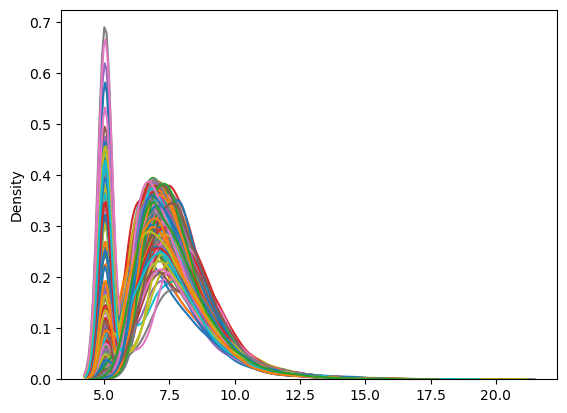

In [22]:
for i,row in trans.set_index("Sample.ID").iterrows():
    sns.kdeplot(row.values)

/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dylan/miniconda3/envs/cmo/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

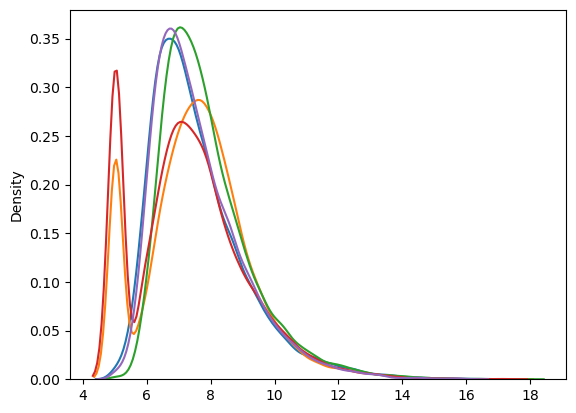

In [23]:
for i,row in trans.set_index("Sample.ID").sample(5).iterrows():
    sns.kdeplot(row.values)

In [24]:
trans = trans.set_index("Sample.ID")

# The Samples order

We need one list of 'good' samples (the samples for which we have all data).

In [25]:
metab_samples = set(metab.index.values)

In [26]:
metag_samples = set(metag.index.values)

In [27]:
gwas_samples = set(gwasdf.columns[3:].unique())

In [28]:
trans_samples = set(trans.index.values)

In [29]:
"_".join(sorted(metab_samples))

'F001_F002_F003_F004_F005_F006_F008_F010_F011_F012_F013_F014_F015_F016_F017_F018_F019_F020_F022_F023_F024_F025_F026_F027_F028_F029_F030_F031_F032_F033_F034_F035_F036_F037_F039_F041_F043_F044_F045_F046_F047_F048_F049_F050_F051_F053_F054_F055_F057_F059_F060_F062_F063_F064_F065_F066_F068_F069_F071_F073_F074_F076_F077_F078_F079_F080_F081_F082_F083_F084_F085_F086_F087_F090_F091_F092_F093_F094_F095_F097_F098_F099_F101_F102_F103_F104_F107_F108_F110_F111_F112_F113_F117_F118_F121_F122_F124_F125_F126_F127_F128_F130_F131_F132_F133_F134_F135_F136_F139_F140_F141_F142_F143_F144_F145_F146_F147_F148_F150_F151_F152_F154_F157_F158_F159_F160_F161_F162_F163_F164_F165_F166_F167_F168_F169_F170_F171_F173_F174_F178_F179_F180_F181_F182_F183_F184_F185_F187_F188_F189_F191_F192_F194_F195_F196_F197_F198_F200_F201_F202_F203_F204_F205_F207_F208_F211_F212_F213_F214_F215_F216_F217_F218_F219_F220_F221_F222_F223_F224_F225_F226_F227_F228_F229_F230_F231_F232_F233_F234_F235_F236_F237_F238_F239_F240_F241_F242_F244_F245_F246

In [30]:
"_".join(sorted(metag_samples))

'F002_F003_F004_F005_F006_F008_F009_F010_F011_F013_F014_F015_F016_F017_F018_F019_F020_F021_F022_F023_F024_F025_F026_F027_F028_F029_F030_F031_F032_F033_F034_F035_F036_F037_F038_F039_F040_F042_F043_F044_F045_F046_F047_F048_F049_F050_F051_F052_F053_F054_F055_F056_F057_F058_F059_F060_F061_F062_F063_F065_F066_F067_F068_F069_F070_F071_F072_F073_F074_F075_F076_F077_F078_F079_F080_F081_F082_F084_F085_F086_F087_F088_F089_F090_F091_F093_F094_F096_F097_F098_F099_F101_F102_F104_F105_F106_F108_F109_F111_F112_F113_F114_F115_F116_F117_F118_F121_F122_F124_F125_F126_F127_F128_F129_F130_F131_F132_F133_F134_F135_F136_F137_F138_F139_F140_F141_F142_F143_F144_F145_F146_F147_F148_F149_F150_F151_F153_F154_F155_F156_F157_F158_F159_F160_F161_F162_F163_F164_F165_F166_F167_F168_F169_F170_F171_F172_F173_F174_F176_F177_F178_F179_F180_F181_F182_F183_F184_F185_F186_F187_F188_F189_F190_F191_F192_F193_F194_F195_F197_F198_F199_F200_F201_F203_F204_F206_F207_F208_F209_F210_F212_F213_F214_F215_F216_F217_F218_F219_F220_F221

In [31]:
"_".join(sorted(gwas_samples))

'F001_F002_F003_F004_F005_F006_F007_F008_F010_F011_F012_F013_F014_F015_F016_F017_F018_F019_F020_F022_F023_F024_F025_F026_F027_F028_F029_F030_F031_F032_F033_F034_F035_F036_F037_F038_F039_F040_F041_F042_F043_F044_F045_F046_F047_F048_F049_F050_F051_F053_F054_F055_F056_F057_F058_F059_F060_F062_F063_F064_F065_F066_F068_F069_F071_F073_F074_F076_F078_F079_F080_F081_F082_F083_F084_F085_F086_F087_F090_F091_F092_F093_F094_F095_F097_F098_F099_F101_F102_F103_F104_F107_F108_F110_F111_F112_F125_F126_F127_F128_F130_F131_F134_F135_F136_F139_F140_F142_F143_F144_F145_F146_F147_F148_F150_F151_F152_F154_F157_F158_F159_F160_F161_F162_F163_F164_F165_F166_F167_F168_F169_F170_F171_F173_F174_F175_F178_F179_F180_F181_F182_F183_F184_F185_F187_F188_F189_F191_F192_F194_F195_F196_F197_F198_F200_F201_F202_F203_F204_F205_F207_F208_F211_F212_F213_F214_F215_F216_F217_F218_F219_F220_F221_F222_F223_F224_F225_F226_F228_F230_F231_F232_F233_F234_F243_F244_F245_F246_F247_F248_F249_F250_F252_F253_F254_F255_F256_F257_F258_F259

In [32]:
"_".join(sorted(trans_samples))

'F001_F002_F003_F004_F005_F006_F008_F010_F011_F012_F013_F014_F015_F016_F017_F018_F019_F020_F022_F023_F024_F025_F026_F027_F028_F029_F031_F033_F034_F038_F039_F040_F041_F042_F043_F044_F045_F047_F049_F050_F053_F055_F056_F062_F063_F064_F065_F066_F068_F069_F073_F076_F078_F082_F083_F084_F085_F086_F087_F094_F095_F097_F101_F102_F103_F104_F107_F108_F110_F111_F112_F113_F118_F119_F121_F122_F123_F124_F125_F126_F127_F128_F130_F131_F134_F135_F136_F139_F140_F142_F143_F144_F145_F147_F148_F150_F151_F152_F154_F157_F158_F159_F160_F161_F162_F163_F164_F165_F166_F167_F168_F169_F170_F173_F174_F178_F181_F182_F183_F184_F185_F187_F188_F189_F191_F192_F194_F195_F196_F197_F198_F200_F201_F202_F204_F205_F207_F208_F211_F213_F214_F215_F216_F218_F219_F221_F222_F223_F224_F226_F227_F228_F229_F230_F231_F232_F233_F234_F235_F236_F237_F238_F239_F240_F241_F242_F243_F245_F246_F247_F248_F249_F250_F251_F252_F253_F254_F256_F257_F258_F259_F260_F261_F262_F263_F264_F266_F267_F268_F269_F270_F271_F272_F273_F275_F277_F278_F279_F280_F281

In [33]:
all_samples_order = sorted(metab_samples.intersection(metag_samples).intersection(gwas_samples).intersection(trans_samples))

In [38]:
all_samples_order

['F002',
 'F003',
 'F004',
 'F005',
 'F006',
 'F008',
 'F010',
 'F011',
 'F013',
 'F014',
 'F015',
 'F016',
 'F017',
 'F018',
 'F019',
 'F020',
 'F022',
 'F023',
 'F024',
 'F025',
 'F026',
 'F027',
 'F028',
 'F029',
 'F031',
 'F033',
 'F034',
 'F039',
 'F043',
 'F044',
 'F045',
 'F047',
 'F049',
 'F050',
 'F053',
 'F055',
 'F062',
 'F063',
 'F065',
 'F066',
 'F068',
 'F069',
 'F073',
 'F076',
 'F078',
 'F082',
 'F084',
 'F085',
 'F086',
 'F087',
 'F094',
 'F097',
 'F101',
 'F102',
 'F104',
 'F108',
 'F111',
 'F112',
 'F125',
 'F126',
 'F127',
 'F128',
 'F130',
 'F131',
 'F134',
 'F135',
 'F136',
 'F139',
 'F140',
 'F142',
 'F143',
 'F144',
 'F145',
 'F147',
 'F148',
 'F150',
 'F151',
 'F154',
 'F157',
 'F158',
 'F159',
 'F160',
 'F161',
 'F162',
 'F163',
 'F164',
 'F165',
 'F166',
 'F167',
 'F168',
 'F169',
 'F170',
 'F173',
 'F174',
 'F178',
 'F181',
 'F182',
 'F183',
 'F184',
 'F185',
 'F187',
 'F188',
 'F189',
 'F191',
 'F192',
 'F194',
 'F195',
 'F197',
 'F198',
 'F200',
 'F201',
 

In [34]:
"_".join(all_samples_order)

'F002_F003_F004_F005_F006_F008_F010_F011_F013_F014_F015_F016_F017_F018_F019_F020_F022_F023_F024_F025_F026_F027_F028_F029_F031_F033_F034_F039_F043_F044_F045_F047_F049_F050_F053_F055_F062_F063_F065_F066_F068_F069_F073_F076_F078_F082_F084_F085_F086_F087_F094_F097_F101_F102_F104_F108_F111_F112_F125_F126_F127_F128_F130_F131_F134_F135_F136_F139_F140_F142_F143_F144_F145_F147_F148_F150_F151_F154_F157_F158_F159_F160_F161_F162_F163_F164_F165_F166_F167_F168_F169_F170_F173_F174_F178_F181_F182_F183_F184_F185_F187_F188_F189_F191_F192_F194_F195_F197_F198_F200_F201_F204_F207_F208_F213_F214_F215_F216_F218_F219_F221_F223_F224_F226_F230_F231_F232_F233_F234_F245_F247_F249_F250_F252_F253_F256_F257_F258_F261_F262_F263_F267_F268_F269_F271_F273_F275_F277_F278_F279_F280_F281_F283_F285_F286_F288_F289_F290_F299_F300_F301_F302_F303_F304_F305_F306_F309_F311_F315_F316_F317_F318_F320_F321_F323_F324_F325_F326_F328_F329_F331_F332_F333_F334_F335_F336_F338_F341_F342_F343_F344_F345_F346_F349_F350_F351_F352_F353_F354_F362

In [35]:
len(all_samples_order)

219

In [36]:
# Do we still need these? TODO
# pickle.dump(all_samples_order, open(f"{PATH_PROCESSED}DataForNetworks_All_samples_order_Jun9.pickle","wb"))

In [41]:
# load Dylan's test samples and dump in a pickle
test_samples_F = pd.read_csv(f"{PATH_PROCESSED}test_samples_4_January_2023.txt", index_col=0)

test_sample_set = set(test_samples_F.ids.values)
test_sample_set = set(test_sample_set.intersection(set(all_samples_order)))

trainval_samples = sorted(set(all_samples_order) - test_sample_set)

pickle.dump(trainval_samples, open(f"{PATH_PROCESSED}ORDERED_TRAINVAL_IDS.pickle","wb"))


In [42]:
trainval_samples

['F002',
 'F003',
 'F004',
 'F005',
 'F006',
 'F008',
 'F011',
 'F013',
 'F016',
 'F017',
 'F018',
 'F019',
 'F022',
 'F023',
 'F026',
 'F027',
 'F028',
 'F029',
 'F033',
 'F034',
 'F039',
 'F044',
 'F045',
 'F047',
 'F049',
 'F050',
 'F053',
 'F055',
 'F062',
 'F063',
 'F065',
 'F066',
 'F068',
 'F069',
 'F073',
 'F076',
 'F078',
 'F082',
 'F084',
 'F085',
 'F086',
 'F087',
 'F094',
 'F097',
 'F102',
 'F108',
 'F111',
 'F126',
 'F127',
 'F128',
 'F130',
 'F131',
 'F134',
 'F136',
 'F139',
 'F140',
 'F142',
 'F143',
 'F144',
 'F145',
 'F147',
 'F150',
 'F151',
 'F154',
 'F157',
 'F159',
 'F160',
 'F161',
 'F162',
 'F163',
 'F164',
 'F165',
 'F167',
 'F169',
 'F170',
 'F174',
 'F182',
 'F183',
 'F184',
 'F185',
 'F187',
 'F188',
 'F189',
 'F191',
 'F192',
 'F194',
 'F195',
 'F198',
 'F200',
 'F201',
 'F204',
 'F207',
 'F208',
 'F215',
 'F216',
 'F218',
 'F221',
 'F223',
 'F224',
 'F226',
 'F230',
 'F231',
 'F232',
 'F233',
 'F234',
 'F245',
 'F247',
 'F249',
 'F250',
 'F253',
 'F256',
 

In [ ]:
len(trainval_samples)

178

In [ ]:
len(test_sample_set)

41

In [ ]:
len(set(trainval_samples).union(test_sample_set))

219

In [ ]:
test_samples = sorted(list(test_sample_set))

# The genes order

Similarly we need one good list of all 'good' genes. 
This is the genes for which we have normed RNAseq counts and GWAS data, followed by the genes for which we have RNA but not gwas

In [ ]:
# Let's start with
# the raw mapping of snps to genes
themap = pd.read_csv(f"{PATH_RAW}{const.GENE_ANNOTATION}.txt")
themap.head()

,marker,GeneSymbol,Class
0,NC_059442.1_219649,LOC123726714,protein_coding
1,NC_059442.1_422675,wdr32,protein_coding
2,NC_059442.1_423636,wdr32,protein_coding
3,NC_059442.1_424097,wdr32,protein_coding
4,NC_059442.1_424181,wdr32,protein_coding


In [ ]:
# of those genes, only a subset is encountered in the RNAseq normed counts
# load the raw normed rna
rna = pd.read_csv(f"{PATH_RAW}{const.TRANSCRIPTOME_RAW}.csv")
# the columns names are the genes in NC_001960.1+rna133438 format
# split and keep the gene name
rna.columns = ["Sample.ID"]+[x.split("+")[1] for x in rna.columns[1:]]
# keep the gene names
rna_genes = rna.columns[1:]
# put sample id as index and transpose
rna = rna.set_index("Sample.ID").T

# we have derived the samples order in previous work use it to filter the samples
rna = rna[all_samples_order].copy()

# # Are there genes in the rna table with no assigned SNPs ?
rna_genes = set(rna_genes)
genes_with_snps = set(themap.GeneSymbol.unique())

# # Are there genese in the rna table with no assigned SNPs ?
# # Annoyingly yes
# len(rna_genes - genes_with_snps)

# # These are the genes for which we have both snps and rna
# # This is how many features the GWAS layer will output
thegeneset = rna_genes.intersection(genes_with_snps)

# # The genes with rna but no mutations (can be super important genes that are deleterious if mutated?)
no_mutation_genes = rna_genes-genes_with_snps

# # Let's put them in sorted lists
thegenesetlist = sorted(list(rna_genes.intersection(genes_with_snps)))
no_mutation_genes = sorted(list(no_mutation_genes))

gene_order_rna_official = thegenesetlist + no_mutation_genes

In [ ]:
rna.T.loc[all_samples_order, gene_order_rna_official].head()

,1433b,143b2,143g1,2a5e,4f2,5nt1a,LOC100136352,LOC100136353,LOC100136354,LOC100136364,...,ubil,unc119.1,wdr55,zbtb49,zcrb1,zgc:101583,zgc:112271,zgc:162634,zn503,znf503
Sample.ID,,,,,,,,,,,,,,,,,,,,,
F002,8.228803,10.642114,8.008146,8.664696,9.849611,7.783078,12.492871,12.026031,11.429684,7.701277,...,8.709671,6.205045,6.721272,6.839475,6.876455,8.033884,6.310309,7.668472,5.619467,5.856548
F003,8.643025,10.539054,8.000962,8.201590,10.582260,7.636555,12.700801,11.418342,10.488037,8.113418,...,10.263724,6.391518,6.146037,6.553390,6.643837,8.391227,6.908026,8.284562,6.088478,6.413118
F004,5.956833,10.835880,8.092081,8.547840,9.075364,8.207422,13.283415,11.583582,11.180475,7.705314,...,7.972639,6.584228,6.737145,6.584228,7.032914,8.248987,6.168802,7.553502,6.941935,6.407520
F005,6.892844,11.015085,7.600201,8.461058,9.100262,7.466592,12.768129,11.846070,10.495586,7.677500,...,9.330242,6.452092,6.959302,6.763372,7.105828,7.986008,5.945056,7.194978,6.491205,6.347614
F006,6.776187,10.683981,7.814846,8.615316,9.743911,7.913084,12.470926,11.100856,8.821832,7.194861,...,8.625567,6.454884,6.486275,6.823424,6.898308,8.199906,6.217791,7.234554,6.868899,6.444217


In [ ]:
# Still need this? TODO
# pickle.dump(gene_order_rna_official, open(f"{PATH_PROCESSED}DataForNetworks_gene_order_Jun9.pickle","wb"))
# pickle.dump( [thegenesetlist, no_mutation_genes] , open(f"{PATH_PROCESSED}DataForNetworks_GeneSet-WeirdGeneSet_Jun9.pickle","wb"))

# Pack the official data files

In [ ]:
# First, the target values
# load the metadata file:
meta = pd.read_csv(f"{PATH_RAW}{const.LABELS_RAW}.csv", sep=",")

In [ ]:
meta.head()

,Sample.ID,Size.class,Gutted.Weight.kg,Tapeworm.index,Tapeworm.present,Feed.Type,Metabolome.batch,HostG.Ind.ID,Dataset.MetaG,Dataset.HostRNA,Dataset.Metabolome,Dataset.HostG
0,F001,Medium,3.24,1,True,Feed1,Batch_1,Ind0,False,True,True,True
1,F010,Small,1.77,1,True,Feed1,Batch_1,Ind8,True,True,True,True
2,F100,Medium,3.15,1,True,Feed1,NaN,NaN,False,False,False,False
3,F101,Medium,3.21,1,True,Feed1,Batch_3,Ind87,True,True,True,True
4,F102,Medium,3.34,1,True,Feed1,Batch_3,Ind88,True,True,True,True


In [ ]:
# Get the target class size as one-hot encoded classes
meta["classInt"] = meta["Size.class"].map({"Small":0, "Medium":1, "Large":2})
meta = meta.set_index("Sample.ID")

In [ ]:
# Still need this? TODO
# np.save(f"{PATH_PROCESSED}trainval_samples_Jun13.npy", trainval_samples, allow_pickle=True)
# np.save(f"{PATH_PROCESSED}test_samples_Jun13.npy", test_samples, allow_pickle=True)

In [ ]:
thevals = meta.loc[trainval_samples, "classInt" ].values
NetworkData_trainval_Ys_OneHotClasses = np.eye(3)[thevals]
# Alternatively we might want to do pure regression, so we can grab the weights
NetworkData_trainval_Ys_Weights = meta.loc[trainval_samples, "Gutted.Weight.kg" ].values

np.save( f"{PATH_PROCESSED}{const.TRAIN_y_OHE_CLASSES}.npy", NetworkData_trainval_Ys_OneHotClasses)
np.save( f"{PATH_PROCESSED}{const.TRAIN_y_CONTINUOUS_WEIGHTS}.npy", NetworkData_trainval_Ys_Weights)

In [ ]:
# Commenting out to remove temptation
# thevals = meta.loc[test_samples, "classInt" ].values
# NetworkData_test_Ys_OneHotClasses = np.eye(3)[thevals]
# # Alternatively we might want to do pure regression, so we can grab the weights
# NetworkData_test_Ys_Weights = meta.loc[test_samples, "Gutted.Weight.kg" ].values

# np.save( f"{PATH_PROCESSED}NetworkData_test_Ys_OneHotClasses_Jun9.npy", NetworkData_test_Ys_OneHotClasses)
# np.save( f"{PATH_PROCESSED}NetworkData_test_Ys_Weights_Jun9.npy", NetworkData_test_Ys_Weights)

## Metabolome


In [ ]:
metab = metab.loc[all_samples_order].copy()

In [ ]:
metab.head()

,FT_1,FT_2,FT_3,FT_4,FT_5,FT_6,FT_7,FT_8,FT_9,FT_10,...,FT_962,FT_963,FT_964,FT_965,FT_966,FT_967,FT_968,FT_969,FT_970,FT_971
Sample.ID,,,,,,,,,,,,,,,,,,,,,
F002,9.285557,8.736397,9.209515,8.949390,8.100371,8.812913,7.868056,9.484300,7.068186,9.431364,...,4.885355,5.613677,6.006068,7.875640,8.245513,5.629928,7.792392,3.824626,8.089905,8.380211
F003,7.637490,8.855519,5.703281,7.557507,8.274158,7.136721,7.964731,8.918030,7.921686,9.356026,...,5.008534,6.646536,5.529717,7.998259,8.722634,6.034191,8.201397,3.630203,8.264818,8.451786
F004,9.283301,8.863917,9.164353,8.952308,8.491362,8.795185,8.146128,9.511883,7.079181,9.478566,...,5.895134,5.384583,6.003378,7.895975,8.488551,6.115708,8.064458,4.680180,8.480007,8.283301
F005,8.791691,8.879669,8.227887,8.469822,8.577492,8.301030,8.075547,8.724276,7.539076,9.474216,...,5.490136,5.600212,6.635399,7.894316,8.603144,6.471192,8.041393,5.718864,8.568202,8.225309
F006,8.271842,9.064458,7.127105,8.012837,8.296665,7.756636,8.376577,9.757396,7.269513,9.322219,...,5.360174,5.657847,6.097356,7.909021,8.583199,6.107166,7.506505,3.905624,8.283301,6.709909


In [ ]:
np.save(f"{PATH_PROCESSED}{const.METABOLOME_X_TRAINVAL}.npy", metab.loc[trainval_samples].values)
np.save(f"{PATH_PROCESSED}{const.METABOLOME_X_TRAINVAL_COLS}.npy", metab.loc[trainval_samples].columns.values)

In [ ]:
# np.save(f"{PATH_PROCESSED}NetworkData_metabolomic_test_Xs_Jun9.npy", metab.loc[test_samples].values)
# np.save(f"{PATH_PROCESSED}NetworkData_metabolomic_test_Xs_columns_Jun9.npy", metab.loc[test_samples].columns.values)

# Metagenome

In [ ]:
metag = metag.loc[all_samples_order].copy()

In [ ]:
metag.head()

,MAG07_Photobacterium_iliopiscarium,MAG06_Photobacterium_phosphoreum,MAG15_Psychromonas_sp,MAG08_Aliivibrio_sp,MAG09_Aliivibrio_sp,MAG10_Aliivibrio_salmonicida,MAG16_Prevotella_sp,MAG03_Mycoplasma_sp,MAG14_Clostridium_ljungdahlii,MAG12_Carnobacterium_maltaromaticum,MAG11_Brevinema_sp,MAG02_Mycoplasma_sp,MAG05_Mycoplasma_sp,MAG13_Lactobacillus_johnsonii,MAG04_Mycoplasma_sp,MAG01_Mycoplasma_salmoninae
Sample.ID,,,,,,,,,,,,,,,,
F002,-1.244594,-0.097346,-2.201062,0.126388,-1.305537,-1.395583,-2.825605,0.500626,-2.951904,-0.968336,-1.575628,0.654835,0.725276,-0.578526,0.048223,3.247481
F003,-1.571994,-1.026230,-2.242860,-2.160445,-2.356454,-2.321638,-2.832577,0.267646,-1.068718,-1.244928,-0.253286,-0.085581,-0.022276,-1.469576,0.060624,3.262789
F004,-1.118752,0.026170,-2.450102,-2.053557,-0.434861,-2.703228,-3.992892,1.011293,-2.341392,0.984237,0.999587,0.660482,0.853996,-0.861583,1.028433,3.921756
F005,-2.216363,-1.168249,-3.869748,-2.427007,-2.586328,-3.320701,-4.134110,0.122440,-3.233309,-0.385090,-1.888956,-0.260771,0.375919,-0.963312,-0.138237,2.936757
F006,-2.807256,-2.831472,-4.051091,-2.594624,-2.141383,-3.557171,-3.686091,0.045655,-3.151713,-1.567680,-1.443524,-0.119695,-0.628255,-1.157156,-0.109204,3.091986


In [ ]:
metag.shape

(219, 16)

In [ ]:
# Replace inf with zero
metag.replace([np.inf, -np.inf], 0, inplace=True)


In [ ]:
np.save(f"{PATH_PROCESSED}{const.MICROBIOME_X_TRAINVAL}.npy", metag.loc[trainval_samples].values)
np.save(f"{PATH_PROCESSED}{const.MICROBIOME_X_TRAINVAL_COLS}.npy", metag.loc[trainval_samples].columns.values)

In [ ]:
# np.save(f"{PATH_PROCESSED}NetworkData_metagenomic_test_Xs_Jun9.npy", metag.loc[test_samples].values)
# np.save(f"{PATH_PROCESSED}NetworkData_metagenomic_test_Xs_columns_Jun9.npy", metag.loc[test_samples].columns.values)

# Transcriptomics

In [ ]:
rna.head()

Sample.ID,F002,F003,F004,F005,F006,F008,F010,F011,F013,F014,...,F381,F382,F383,F386,F399,F400,F401,F408,F415,F417
rna133438,6.526460,5.765661,6.784017,6.836987,5.842079,6.302693,6.286184,5.610602,6.281310,7.459427,...,7.863807,7.380803,7.733301,8.695668,8.213335,9.872476,6.699501,7.316658,8.457629,9.266829
rna133439,12.923831,12.472273,13.784496,13.605068,11.341621,12.340616,12.869765,10.298358,12.059438,13.894923,...,14.873559,14.642512,14.838774,16.720614,15.089582,16.207683,14.124914,14.125214,16.677102,17.128600
rna133441,12.064636,12.712418,12.601056,12.782457,10.649959,12.239457,11.272096,9.630436,10.965911,12.129278,...,12.902141,13.443673,13.424849,15.699351,13.001762,13.732750,12.992990,12.925614,15.826871,16.263219
rna133449,5.950664,6.300380,6.364024,6.879115,6.025825,5.558529,6.624887,5.721281,5.690164,6.081326,...,6.457932,8.373947,7.130800,8.917013,5.964567,7.918613,6.889813,6.936674,8.926167,7.665508
rna133451,5.665680,5.849917,5.666555,6.127476,6.009205,5.463027,5.879849,5.522210,5.473469,5.692101,...,5.911198,6.676430,6.114549,7.146505,5.596184,6.933832,6.417059,5.942057,7.040674,7.477375


In [ ]:
rnatopack = rna.T.loc[all_samples_order, gene_order_rna_official]

In [ ]:
np.save(f"{PATH_PROCESSED}{const.TRANSCRIPTOME_X_TRAINVAL}.npy", rnatopack.loc[trainval_samples].values)
np.save(f"{PATH_PROCESSED}{const.TRANSCRIPTOME_X_TRAINVAL_COLS}.npy", rnatopack.loc[trainval_samples].columns.values)

In [ ]:
# np.save(f"{PATH_PROCESSED}NetworkData_transcriptomic_test_Xs_Jun9.npy", rnatopack.loc[test_samples].values)
# np.save(f"{PATH_PROCESSED}NetworkData_transcriptomic_test_Xs_columns_Jun9.npy", rnatopack.loc[test_samples].columns.values)

# GWAS

We'll use the gene_list and the sample_list to filter the GWAS table,
but also we'll remove features of the gwas that are very correlated to other features.

The following cells show how it was done, but we'll load the csv instead of re-creating

In [ ]:
fthemap = themap[themap.GeneSymbol.isin(gene_order_rna_official)].copy()
fthemap.shape

# load the big dose file
big = pd.read_csv(f"{PATH_RAW}{const.GWAS_RAW}.dose.gz", sep=" ")

# we need to filter both the columns and the rows
# First, let's rename the columns to Fxxx names
# Load a mapping of IndX --> FXXX names
sidm = pd.read_csv(f"{PATH_RAW}{const.LABELS_RAW}.csv")
sidm = sidm[["Sample.ID","HostG.Ind.ID"]]
sampleD = {b:a for a,b in sidm.dropna().values}
# rename the samples in the raw big
big.columns = list(big.columns[:3]) + [sampleD.get(x) for x in big.columns[3:]]

# Again, we have an official order of samples

# big[all_samples_order].shape
# >> (3440818, 219)
# okey we filtered the samples
big = big.set_index("marker")[all_samples_order]

In [ ]:
big.shape

(3440818, 219)

## First Way

We'll only keep SNPs assigned to genes, calling this "F1"

In [ ]:
# We have all the gene-assigned SNPs in the 'fthemap' dataframe
# so we just need to put them in the proper 'thegenesetlist' order:

foo = fthemap.copy()
foo["test"] = pd.Categorical( foo.GeneSymbol, categories = thegenesetlist, ordered=True )
foo = foo.sort_values(by="test")
foo = foo.drop("test", axis=1)

#sanity check
assert (foo.GeneSymbol.unique() == thegenesetlist).sum() == len(thegenesetlist)

# big.loc[foo.marker].T.to_csv("./DataForNetworks_gwasFiltered_NoCorrdrop_Jun7.csv")
foo.to_csv(f"{PATH_PROCESSED}GWASmarkers_F1_GroupedLinearOrder.csv")

In [ ]:
big.head()

,F002,F003,F004,F005,F006,F008,F010,F011,F013,F014,...,F381,F382,F383,F386,F399,F400,F401,F408,F415,F417
marker,,,,,,,,,,,,,,,,,,,,,
NC_059442.1_84727,0.0013,0.9780,0.0035,0.0002,0.0005,0.0000,0.0005,0.0106,0.0013,0.0106,...,0.1223,0.1223,0.1223,0.0347,0.1223,0.0347,0.1223,0.0013,0.0347,0.0106
NC_059442.1_84730,0.0005,0.9713,0.0020,0.0001,0.0001,0.0000,0.0002,0.0076,0.0005,0.0076,...,0.1111,0.1111,0.1111,0.0289,0.1111,0.0289,0.1111,0.0005,0.0289,0.0076
NC_059442.1_132329,0.0647,0.1294,0.1294,0.0086,0.0086,0.1294,0.0001,0.1294,0.9317,0.0086,...,0.0043,0.0043,0.0170,0.0334,0.1294,0.1294,0.1294,0.0043,0.0647,0.1294
NC_059442.1_141907,1.0000,1.0000,1.0002,1.0000,0.0419,1.0003,0.0001,1.0000,1.0000,0.0214,...,0.0033,0.0419,0.0214,1.0000,0.7947,0.7947,0.7947,0.7947,1.0000,1.0000
NC_059442.1_141912,1.0000,1.0000,1.0009,1.0000,0.0395,1.0001,0.0000,1.0000,1.0000,0.0203,...,0.0026,0.0395,0.0203,1.0000,0.7893,0.7893,0.7893,0.7893,1.0000,1.0000


In [ ]:
big.T

marker,NC_059442.1_84727,NC_059442.1_84730,NC_059442.1_132329,NC_059442.1_141907,NC_059442.1_141912,NC_059442.1_170531,NC_059442.1_170604,NC_059442.1_170619,NC_059442.1_170628,NC_059442.1_179561,...,NW_025550964.1_222391,NW_025550964.1_235749,NW_025550964.1_235790,NW_025550964.1_235823,NW_025550964.1_235828,NW_025550964.1_235908,NW_025550964.1_236516,NW_025550964.1_236524,NW_025550964.1_236580,NW_025550964.1_236861
F002,0.0013,0.0005,0.0647,1.0000,1.0000,0.0009,0.0024,0.0004,0.7897,0.0027,...,0.9932,0.0093,0.0020,0.0020,0.0020,0.0546,1.0000,0.0021,0.0548,1.0000
F003,0.9780,0.9713,0.1294,1.0000,1.0000,1.0533,0.2837,0.1870,0.2278,0.0025,...,0.5112,1.0000,0.9900,0.9928,0.9882,0.0000,0.0075,0.9900,0.0619,0.3434
F004,0.0035,0.0020,0.1294,1.0002,1.0009,0.0001,0.0629,0.0265,0.0258,0.0200,...,0.9926,0.0021,0.2328,0.9999,1.0000,0.0006,1.0000,0.0205,0.0111,0.9992
F005,0.0002,0.0001,0.0086,1.0000,1.0000,0.0009,0.0001,0.0000,0.0000,0.0006,...,0.0004,0.0059,0.5884,0.0018,0.0009,0.9914,0.0003,0.0006,0.0001,1.0000
F006,0.0005,0.0001,0.0086,0.0419,0.0395,0.8754,0.0358,0.0511,0.0914,0.0002,...,0.0268,0.0001,0.0000,0.0000,0.0000,0.0759,0.0022,0.0011,1.0000,0.9820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F400,0.0347,0.0289,0.1294,0.7947,0.7893,0.1066,0.2837,0.1870,0.2278,0.1394,...,0.2028,0.1064,0.2190,0.2665,0.2636,0.2470,0.1256,0.1644,0.1452,0.8892
F401,0.1223,0.1111,0.1294,0.7947,0.7893,0.1066,0.2837,0.1870,0.2278,0.1298,...,0.2028,0.1064,0.2190,0.2665,0.2636,0.2470,0.1256,0.1644,0.1452,0.8892
F408,0.0013,0.0005,0.0043,0.7947,0.7893,0.0000,0.0000,0.0001,0.0000,0.1933,...,0.0007,0.0117,0.9993,1.0000,1.0000,0.0008,0.0025,0.0200,0.8051,0.0837
F415,0.0347,0.0289,0.0647,1.0000,1.0000,0.0035,0.9540,0.0045,0.9680,0.0008,...,1.1418,0.1320,0.2043,0.2644,0.2621,0.3309,0.1738,0.0291,0.0321,1.2322


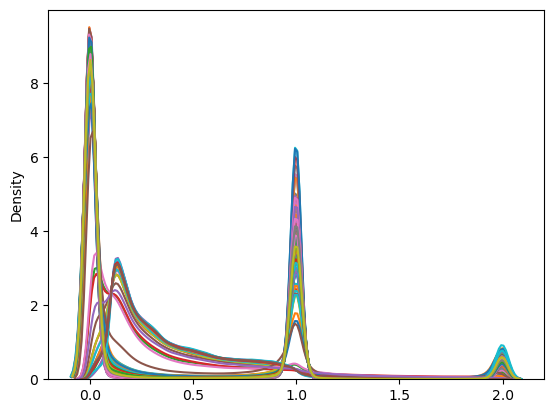

In [ ]:
i = 0
for idx,row in big.T.iterrows():
    # print(row)
    # i+=1
    sns.kdeplot(row.values)

In [ ]:
a = big.loc[foo.marker,trainval_samples].T
b = big.loc[foo.marker,test_samples].T

a.shape, b.shape

((178, 844629), (41, 844629))

In [ ]:
np.save(f"{PATH_PROCESSED}{const.GWAS_X_TRAINVAL}.npy", a.values)
np.save(f"{PATH_PROCESSED}{const.GWAS_X_TRAINVAL_COLS}.npy", a.columns.values)

# np.save(f"{PATH_PROCESSED}NetworkData_gwasF1_test_Xs_Jun9.npy", b.values)
# np.save(f"{PATH_PROCESSED}NetworkData_gwasF1_test_Xs_columns_Jun9.npy", b.columns.values)

## Load files

In [ ]:
trainval_y_onehot = np.load( f"{PATH_PROCESSED}{const.TRAIN_y_OHE_CLASSES}.npy")
trainval_y_floats = np.load( f"{PATH_PROCESSED}{const.TRAIN_y_CONTINUOUS_WEIGHTS}.npy")
trainval_y_onehot.shape, trainval_y_floats.shape

((178, 3), (178,))

In [ ]:
trainval_metagdata = np.load(f"{PATH_PROCESSED}{const.MICROBIOME_X_TRAINVAL}.npy")
trainval_metagcols = np.load(f"{PATH_PROCESSED}{const.MICROBIOME_X_TRAINVAL_COLS}.npy", allow_pickle=True)
trainval_metagdata.shape, trainval_metagcols.shape

((178, 16), (16,))

In [ ]:
trainval_metabdata = np.load(f"{PATH_PROCESSED}{const.METABOLOME_X_TRAINVAL}.npy")
trainval_metabcols = np.load(f"{PATH_PROCESSED}{const.METABOLOME_X_TRAINVAL_COLS}.npy", allow_pickle=True)

trainval_metabdata.shape, trainval_metabcols.shape

((178, 971), (971,))

In [ ]:
trainval_transcdata = np.load(f"{PATH_PROCESSED}{const.TRANSCRIPTOME_X_TRAINVAL}.npy")
trainval_transccols = np.load(f"{PATH_PROCESSED}{const.TRANSCRIPTOME_X_TRAINVAL_COLS}.npy", allow_pickle=True)
trainval_transcdata.shape, trainval_transccols.shape

((178, 19500), (19500,))

In [ ]:
# TODO missing NetworkData_F1gwas_groups_Jun9

trainval_f1gwasdata = np.load(f"{PATH_PROCESSED}{const.GWAS_X_TRAINVAL}.npy")
trainval_f1gwascols = np.load(f"{PATH_PROCESSED}{const.GWAS_X_TRAINVAL_COLS}.npy", allow_pickle=True)

#f1gwasgroups = np.load(f"{PATH_PROCESSED}NetworkData_F1gwas_groups_Jun9.npy")

trainval_f1gwasdata.shape, #f1gwasgroups.shape, trainval_f1gwascols.shape

((178, 844629),)